In [13]:
# Imports 

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import yfinance as yf
from statsmodels.graphics.tsaplots import plot_acf , plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from time import time 
import datetime
import warnings

warnings.filterwarnings('ignore')

In [14]:
# Importing the stock data and storing it in a dataframe

import json
import pandas as pd

tunisian_stock_market = 'Tunisian-Stock-Market.json'
with open(tunisian_stock_market, 'r') as json_file:
    
    json_data = json.load(json_file)

RawStockData = pd.DataFrame(json_data)
bna_data = RawStockData[RawStockData['Stock_name'] == 'BNA']
bna_data = bna_data.sort_values(by='Date')
prices = pd.concat([bna_data['Date'], bna_data['Adj_Close']], axis=1)
prices.set_index('Date', inplace=True)
bna_data.reset_index(inplace=True)
columnsToExclude = ['Code_isin','index','Stock_name']
bna_data = bna_data.drop(columns=columnsToExclude)
print(bna_data)
print(prices)

            Date  Adj_Close  Adj_low  Adj_High         Volume
0     2011-01-03     11.173   10.952    11.298    1721.199951
1     2011-01-04     11.129   10.952    11.129  105979.023438
2     2011-01-05     11.349   10.989    11.349   86125.226562
3     2011-01-06     11.283   11.173    11.393   43161.000000
4     2011-01-07     11.305   11.210    11.320   52695.449219
...          ...        ...      ...       ...            ...
2684  2021-10-29      7.340    7.300     7.340    6610.660156
2685  2021-11-01      7.320    7.200     7.340    5781.819824
2686  2021-11-02      7.310    7.200     7.320   24964.289062
2687  2021-11-03      7.320    7.100     7.320   34433.000000
2688  2021-11-04      7.320    7.220     7.320    6137.930176

[2689 rows x 5 columns]
            Adj_Close
Date                 
2011-01-03     11.173
2011-01-04     11.129
2011-01-05     11.349
2011-01-06     11.283
2011-01-07     11.305
...               ...
2021-10-29      7.340
2021-11-01      7.320
2021-11-02 

In [15]:
#Calculate Return Prices 
returns = prices.pct_change().dropna()
returns

,Adj_Close
Date,
2011-01-04,-0.003938
2011-01-05,0.019768
2011-01-06,-0.005815
2011-01-07,0.001950
2011-01-10,-0.006457
...,...
2021-10-29,0.005479
2021-11-01,-0.002725
2021-11-02,-0.001366


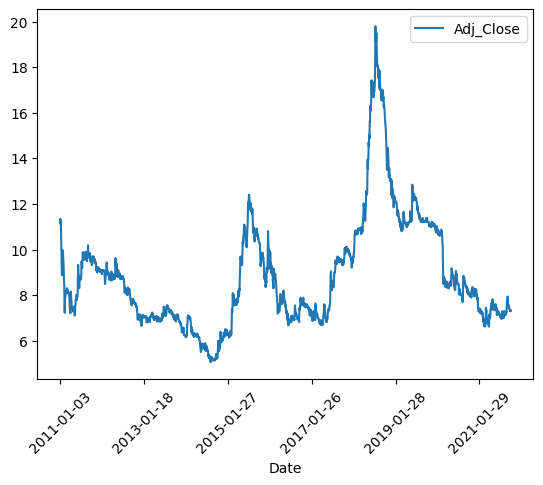

In [16]:

prices.plot(y='Adj_Close')
plt.xticks(rotation=45)
plt.show()

<Figure size 1000x400 with 0 Axes>

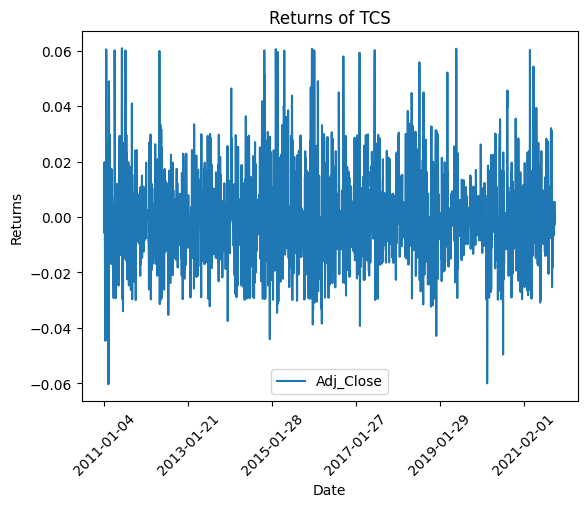

In [17]:
#Plot the return prices 
plt.figure(figsize=(10,4))
returns.plot(y="Adj_Close")
plt.ylabel("Returns")
plt.xlabel("Date")
plt.title("Returns of TCS")
plt.xticks(rotation=45)
plt.show()

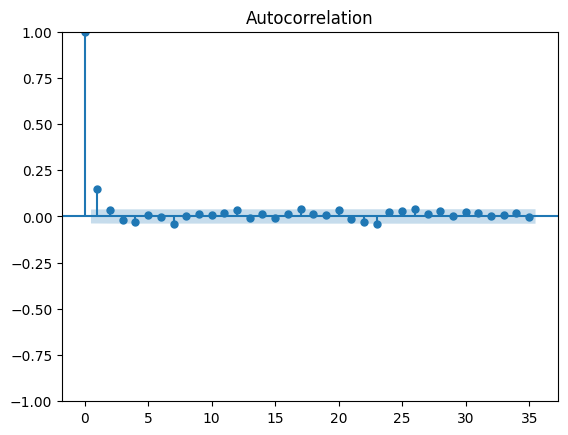

In [18]:
#Plot acf (MA)
plot_acf(returns)
plt.show()

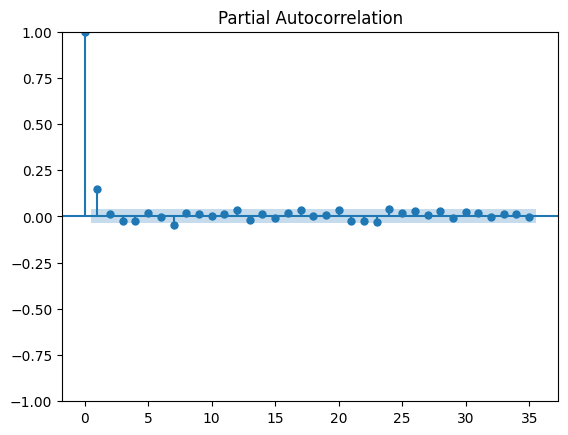

In [19]:
#Plot pacf (AR)
plot_pacf(returns)
plt.show()

In [20]:
#Building the model of ARIMA
model = ARIMA(prices,order=(7,0,6))
fitted = model.fit()
print(fitted.summary())

                               SARIMAX Results                                
Dep. Variable:              Adj_Close   No. Observations:                 2689
Model:                 ARIMA(7, 0, 6)   Log Likelihood                1597.897
Date:                Thu, 16 May 2024   AIC                          -3165.794
Time:                        00:48:53   BIC                          -3077.340
Sample:                             0   HQIC                         -3133.800
                               - 2689                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.9045      0.921      9.672      0.000       7.100      10.709
ar.L1          0.9115      0.536      1.700      0.089      -0.139       1.962
ar.L2          0.4613      0.354      1.305      0.1

In [21]:
#Prediction the next day price 
next_day_price = fitted.forecast(100,alpha=0.05)
print(next_day_price)

2689    7.326059
2690    7.332046
2691    7.335172
2692    7.341608
2693    7.347480
          ...   
2784    7.960699
2785    7.967571
2786    7.974427
2787    7.981266
2788    7.988087
Name: predicted_mean, Length: 100, dtype: float64


In [22]:
predicted_price = next_day_price.values[0]
print(f"The predicted price for tomorrow :" , predicted_price)

The predicted price for tomorrow : 7.32605859672616


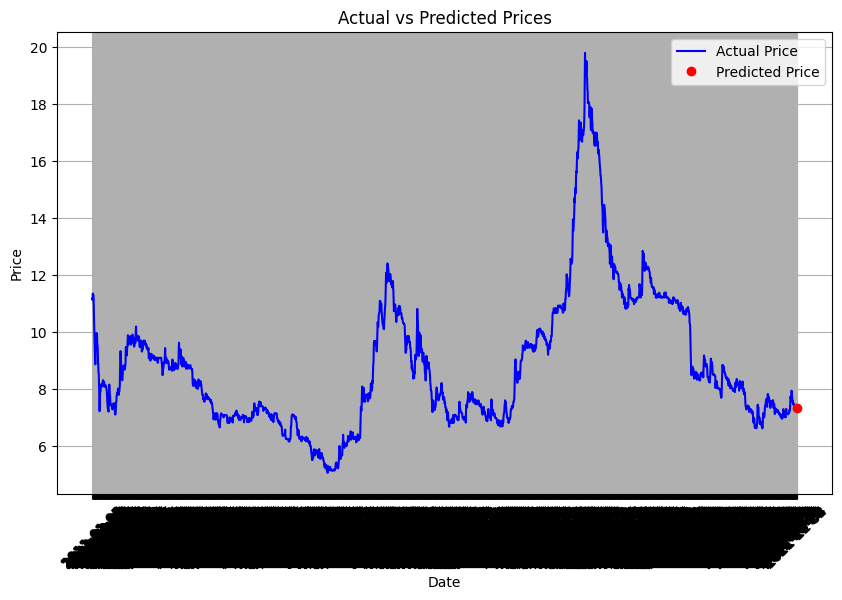

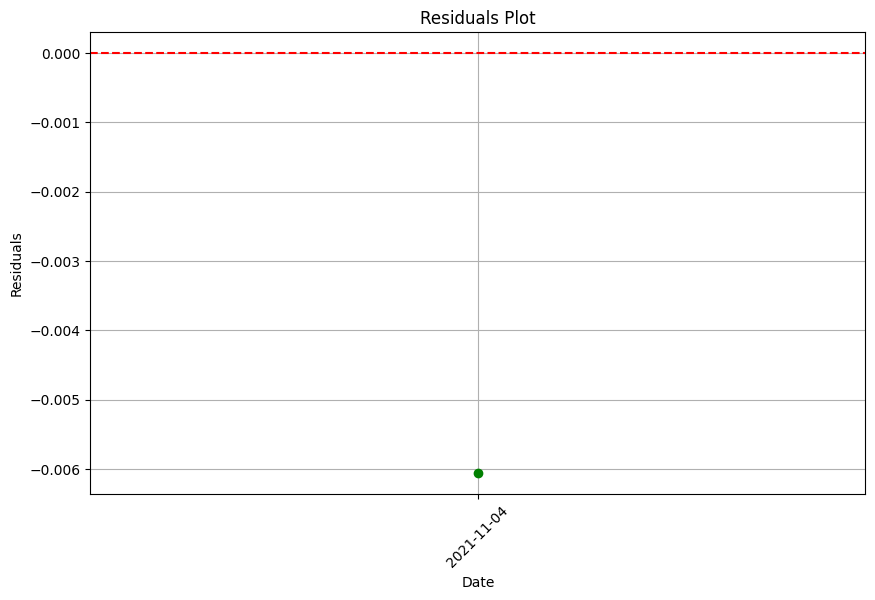

ARIMA Model Evaluation:
Mean Squared Error (MSE): 3.670659429023053e-05
Mean Absolute Error (MAE): 0.006058596726159493
Root Mean Squared Error (RMSE): 0.006058596726159493
R-squared (Coefficient of Determination): nan


In [24]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Function to calculate evaluation metrics
def evaluate_arima(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    return mse, mae, rmse, r2

# Function to plot actual vs predicted values
def plot_actual_vs_predicted(y_true, y_pred):
    plt.figure(figsize=(10, 6))
    plt.plot(y_true.index, y_true, label='Actual Price', color='blue')
    plt.plot(y_pred.index, y_pred, 'ro',label='Predicted Price', color='red')
    plt.title('Actual vs Predicted Prices')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid(True)
    plt.show()

def plot_residuals(y_true, y_pred):
    residuals = y_true.values[-1] - y_pred
    plt.figure(figsize=(10, 6))
    plt.plot([y_true.index[-1]], [residuals], color='green', marker='o')
    plt.axhline(y=0, color='red', linestyle='--')
    plt.title('Residuals Plot')
    plt.xlabel('Date')
    plt.ylabel('Residuals')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()



# Extracting the actual and predicted values for the next day
y_true_next_day = prices['Adj_Close'].iloc[-1]  # Actual value for the next day

# Evaluate ARIMA model
mse_arima, mae_arima, rmse_arima, r2_arima = evaluate_arima(np.array([y_true_next_day]), np.array([predicted_price]))

# Plot actual vs predicted values for ARIMA
plot_actual_vs_predicted(prices, pd.Series([predicted_price], index=[prices.index[-1]]))

# Plot residuals for ARIMA
plot_residuals(prices, np.array([predicted_price]))

print("ARIMA Model Evaluation:")
print("Mean Squared Error (MSE):", mse_arima)
print("Mean Absolute Error (MAE):", mae_arima)
print("Root Mean Squared Error (RMSE):", rmse_arima)
print("R-squared (Coefficient of Determination):", r2_arima)

